<a href="https://colab.research.google.com/github/ssk2001/AI-Tech-Lab-Experiments/blob/main/Hand_written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8620 - loss: 0.4852 - val_accuracy: 0.9549 - val_loss: 0.1553
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9620 - loss: 0.1314 - val_accuracy: 0.9659 - val_loss: 0.1194
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9757 - loss: 0.0861 - val_accuracy: 0.9710 - val_loss: 0.0987
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9820 - loss: 0.0611 - val_accuracy: 0.9728 - val_loss: 0.0959
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9862 - loss: 0.0460 - val_accuracy: 0.9737 - val_loss: 0.0920
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0358 - val_accuracy: 0.9737 - val_loss: 0.0939
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9915 - loss: 0.0282 - val_accuracy: 0.9731 - val_loss: 0.1011
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.021

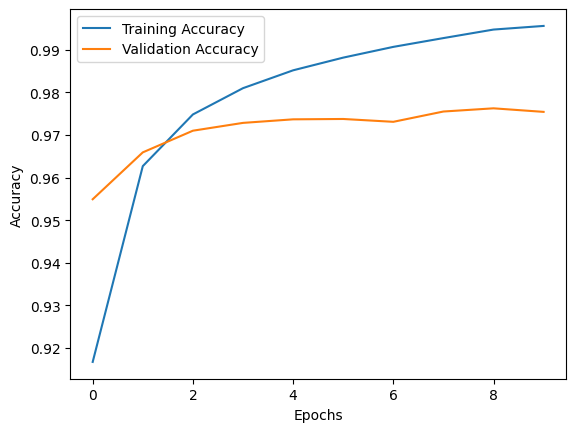

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network model
model = models.Sequential()

# Input layer (Flattening the 28x28 images into a single vector of size 784)
model.add(layers.Flatten(input_shape=(28, 28)))

# Hidden layer with 128 neurons and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Output layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
